In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
import pmdarima as pmd
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE

### Read the data

In [2]:
df  = pd.read_csv('AAPL.csv')

### Describe 


In [3]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,10409.000000,10409.000000,10409.000000,10409.000000,10409.000000,1.040900e+04
mean,13.959910,14.111936,13.809163,13.966757,13.350337,3.321778e+08
std,30.169244,30.514878,29.835055,30.191696,29.911132,3.393344e+08
min,0.049665,0.049665,0.049107,0.049107,0.038384,0.000000e+00
25%,0.281964,0.287946,0.274554,0.281250,0.234799,1.247604e+08
50%,0.468750,0.477679,0.459821,0.468750,0.386853,2.199680e+08
75%,14.217857,14.364286,14.043571,14.206071,12.188149,4.126108e+08
max,182.630005,182.940002,179.119995,182.009995,181.778397,7.421641e+09


In [4]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100323,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.095089,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.088110,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090291,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092908,73449600
...,...,...,...,...,...,...,...
10404,2022-03-18,160.509995,164.479996,159.759995,163.979996,163.979996,123351200
10405,2022-03-21,163.509995,166.350006,163.009995,165.380005,165.380005,95811400
10406,2022-03-22,165.509995,169.419998,164.910004,168.820007,168.820007,81532000
10407,2022-03-23,167.990005,172.639999,167.649994,170.210007,170.210007,98062700


In [5]:
df[df.isna()].sum() # no NA 

Date           0
Open         0.0
High         0.0
Low          0.0
Close        0.0
Adj Close    0.0
Volume       0.0
dtype: object

In [6]:
df['Moving_Avg'] = df['Close'].rolling(window=3).mean()

In [7]:
df['Date'] = pd.to_datetime(df['Date'])

In [8]:
df['Month_Year'] = df['Date'].dt.to_period('M')


In [9]:
last_days = df.groupby('Month_Year').tail(1)

# Reset the index if needed
last_days.reset_index(drop=True, inplace=True)
last_days.set_index('Month_Year')

,Date,Open,High,Low,Close,Adj Close,Volume,Moving_Avg
Month_Year,,,,,,,,
1980-12,1980-12-31,0.152902,0.152902,0.152344,0.152344,0.119080,35750400,0.156622
1981-01,1981-01-30,0.127232,0.127232,0.126116,0.126116,0.098578,46188800,0.132627
1981-02,1981-02-27,0.118304,0.119420,0.118304,0.118304,0.092472,14761600,0.115141
1981-03,1981-03-31,0.110491,0.110491,0.109375,0.109375,0.085493,15993600,0.110119
1981-04,1981-04-30,0.126674,0.127790,0.126674,0.126674,0.099015,12611200,0.125744
...,...,...,...,...,...,...,...,...
2021-11,2021-11-30,159.990005,165.520004,159.919998,165.300003,165.089676,174048100,160.783335
2021-12,2021-12-31,178.089996,179.229996,177.259995,177.570007,177.344055,64062300,178.383336
2022-01,2022-01-31,170.160004,175.000000,169.509995,174.779999,174.557602,115541600,168.110001


In [10]:
df = last_days

In [11]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,Moving_Avg,Month_Year
0,1980-12-31,0.152902,0.152902,0.152344,0.152344,0.119080,35750400,0.156622,1980-12
1,1981-01-30,0.127232,0.127232,0.126116,0.126116,0.098578,46188800,0.132627,1981-01
2,1981-02-27,0.118304,0.119420,0.118304,0.118304,0.092472,14761600,0.115141,1981-02
3,1981-03-31,0.110491,0.110491,0.109375,0.109375,0.085493,15993600,0.110119,1981-03
4,1981-04-30,0.126674,0.127790,0.126674,0.126674,0.099015,12611200,0.125744,1981-04
...,...,...,...,...,...,...,...,...,...
491,2021-11-30,159.990005,165.520004,159.919998,165.300003,165.089676,174048100,160.783335,2021-11
492,2021-12-31,178.089996,179.229996,177.259995,177.570007,177.344055,64062300,178.383336,2021-12
493,2022-01-31,170.160004,175.000000,169.509995,174.779999,174.557602,115541600,168.110001,2022-01
494,2022-02-28,163.059998,165.419998,162.429993,165.119995,165.119995,94869100,164.236669,2022-02


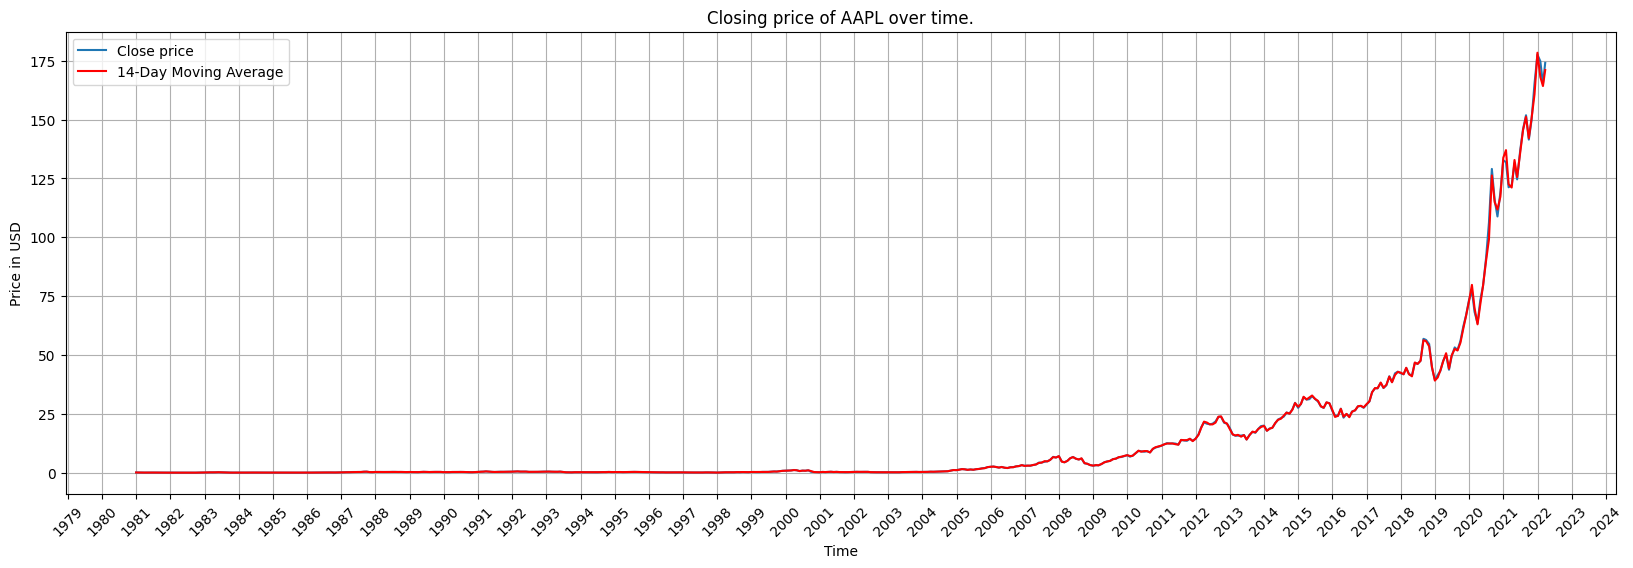

In [12]:
plt.figure(figsize=(20,6))
plt.plot(df['Date'], df['Close'], label = 'Close price')
plt.plot(df['Date'], df['Moving_Avg'], color='red', label='14-Day Moving Average')
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.grid(True)
plt.xticks(rotation=45)
plt.ylabel('Price in USD')
plt.xlabel('Time')
plt.title("Closing price of AAPL over time.")
plt.legend()
plt.show()

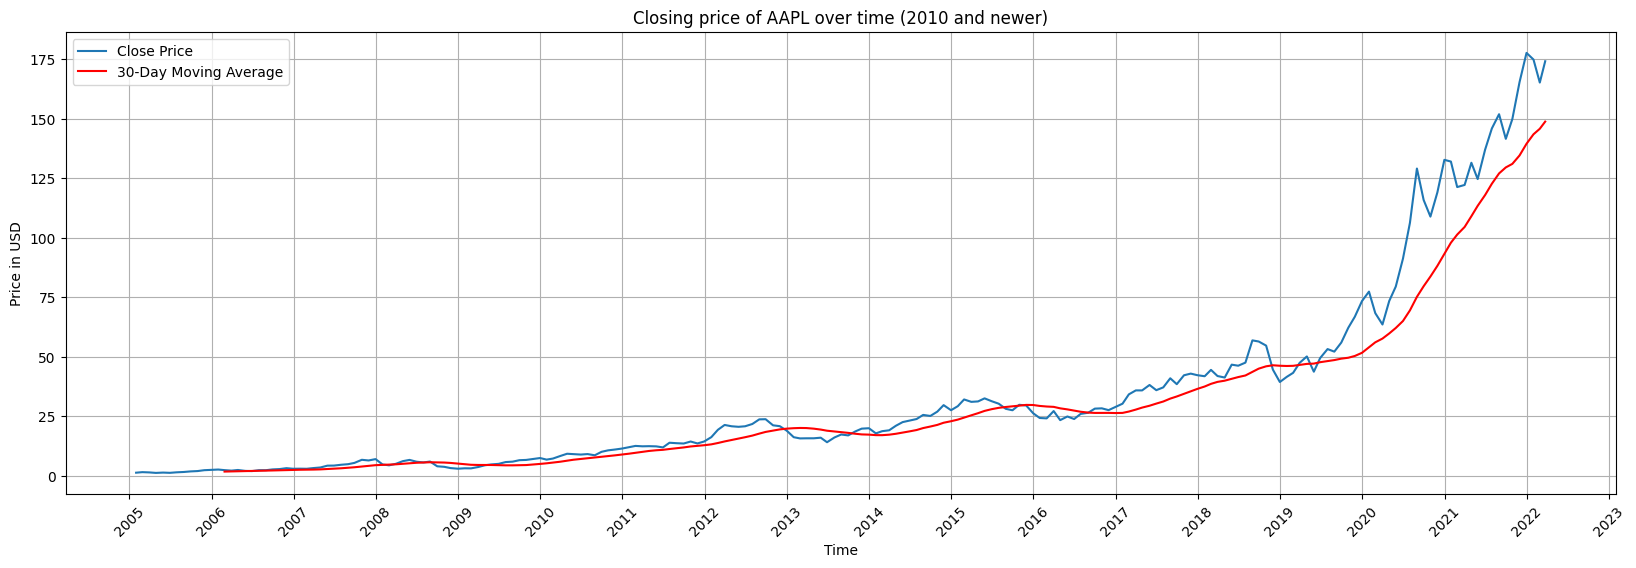

In [13]:
df_new = df[df['Date'] >= '2005-01-01'].copy()
df_new['Moving_Avg'] = df_new['Close'].rolling(window=14).mean()

plt.figure(figsize=(20, 6))
plt.plot(df_new['Date'], df_new['Close'], label='Close Price')
plt.plot(df_new['Date'], df_new['Moving_Avg'], color='red', label='30-Day Moving Average')
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.grid(True)
plt.xticks(rotation=45)
plt.ylabel('Price in USD')
plt.xlabel('Time')
plt.title("Closing price of AAPL over time (2010 and newer)")

plt.legend()
plt.show()

In [14]:
# df = df[df['Date'] >= '2013-01-01']

In [15]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,Moving_Avg,Month_Year
0,1980-12-31,0.152902,0.152902,0.152344,0.152344,0.119080,35750400,0.156622,1980-12
1,1981-01-30,0.127232,0.127232,0.126116,0.126116,0.098578,46188800,0.132627,1981-01
2,1981-02-27,0.118304,0.119420,0.118304,0.118304,0.092472,14761600,0.115141,1981-02
3,1981-03-31,0.110491,0.110491,0.109375,0.109375,0.085493,15993600,0.110119,1981-03
4,1981-04-30,0.126674,0.127790,0.126674,0.126674,0.099015,12611200,0.125744,1981-04
...,...,...,...,...,...,...,...,...,...
491,2021-11-30,159.990005,165.520004,159.919998,165.300003,165.089676,174048100,160.783335,2021-11
492,2021-12-31,178.089996,179.229996,177.259995,177.570007,177.344055,64062300,178.383336,2021-12
493,2022-01-31,170.160004,175.000000,169.509995,174.779999,174.557602,115541600,168.110001,2022-01
494,2022-02-28,163.059998,165.419998,162.429993,165.119995,165.119995,94869100,164.236669,2022-02


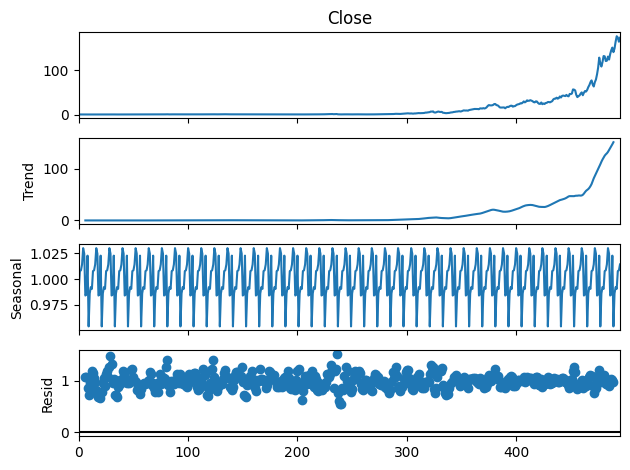

In [16]:
res = sm.tsa.seasonal_decompose(df['Close'], model='multiplicative', period=12)
res.plot()
plt.show()

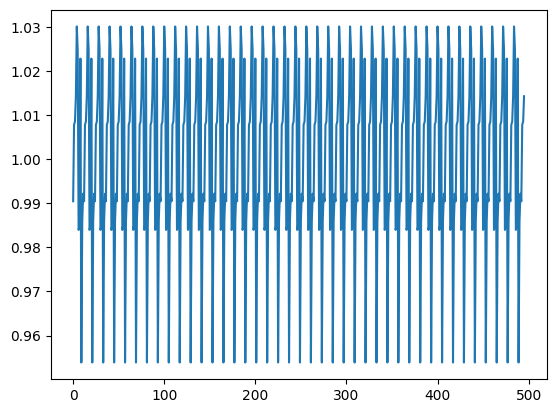

In [17]:
res.seasonal.plot()
plt.show()

### Testing ACF and PACF


- ACF decays slowly
- PACF cuts off sharply at lag 1


-> autoregressive process AR(1) 

In [18]:
df['Close_diff'] = df['Close'] - df['Close'].shift()
df_train = df[df['Date'] <= '2021-01-01'].copy()
df_train = df_train[df_train['Date'] >= '2010-01-01'].copy()
df_test  = df[df['Date'] >= '2021-01-01'].copy()

C:\Users\Vojta\AppData\Local\Temp\ipykernel_16564\2611534981.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Close_diff'] = df['Close'] - df['Close'].shift()


In [19]:
def test_stationarity(df, col):
    result = sm.tsa.adfuller(df[col])
    
    adf_statistic = result[0]
    p_value = result[1]
    used_lag = result[2]
    n_obs = result[3]
    critical_values = result[4]
    ic_best = result[5]
    
    print(f'ADF Statistic: {adf_statistic}')
    print(f'p-value: {p_value}')
    print(f'Used Lag: {used_lag}')
    print(f'Number of Observations Used: {n_obs}')
    print('Critical Values:')
    for key, value in critical_values.items():
        print(f'   {key}: {value}')
    print(f'Best Information Criterion: {ic_best}')
    
    # Interpret the result
    if p_value < 0.05:
        print("The time series is stationary.")
    else:
        print("The time series is not stationary.")

In [20]:
test_stationarity(df, 'Close')

ADF Statistic: 4.547027803613888
p-value: 1.0
Used Lag: 18
Number of Observations Used: 477
Critical Values:
   1%: -3.444133731419755
   5%: -2.8676183066831036
   10%: -2.5700075029117166
Best Information Criterion: 2082.145982636894
The time series is not stationary.


In [21]:
df['Close_diff'] = df['Close'] - df['Close'].shift()
test_stationarity(df.dropna(), 'Close_diff')

ADF Statistic: -0.627920933770729
p-value: 0.8645474174559795
Used Lag: 17
Number of Observations Used: 477
Critical Values:
   1%: -3.444133731419755
   5%: -2.8676183066831036
   10%: -2.5700075029117166
Best Information Criterion: 2097.9229698500853
The time series is not stationary.


C:\Users\Vojta\AppData\Local\Temp\ipykernel_16564\927392610.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Close_diff'] = df['Close'] - df['Close'].shift()


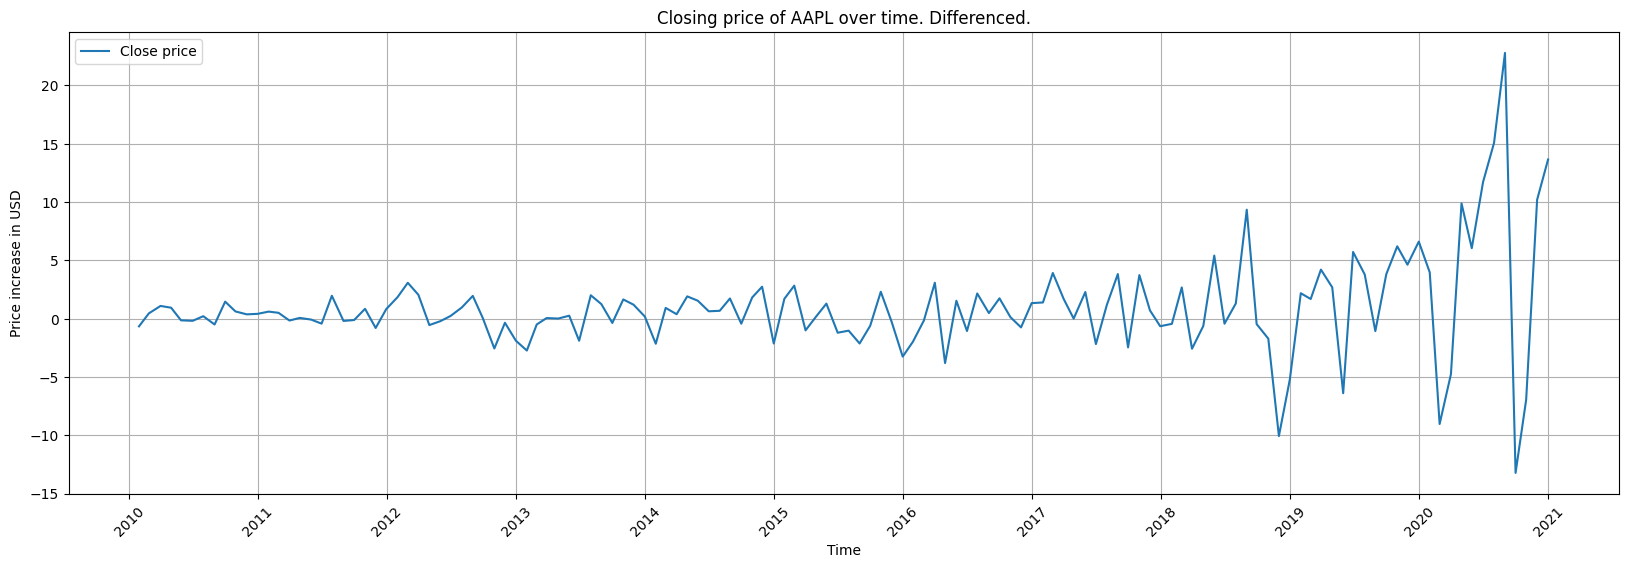

In [22]:
plt.figure(figsize=(20,6))
plt.plot(df_train['Date'], df_train['Close_diff'], label = 'Close price')
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.grid(True)
plt.xticks(rotation=45)
plt.ylabel('Price increase in USD')
plt.xlabel('Time')
plt.title("Closing price of AAPL over time. Differenced.")
plt.legend()
plt.show()

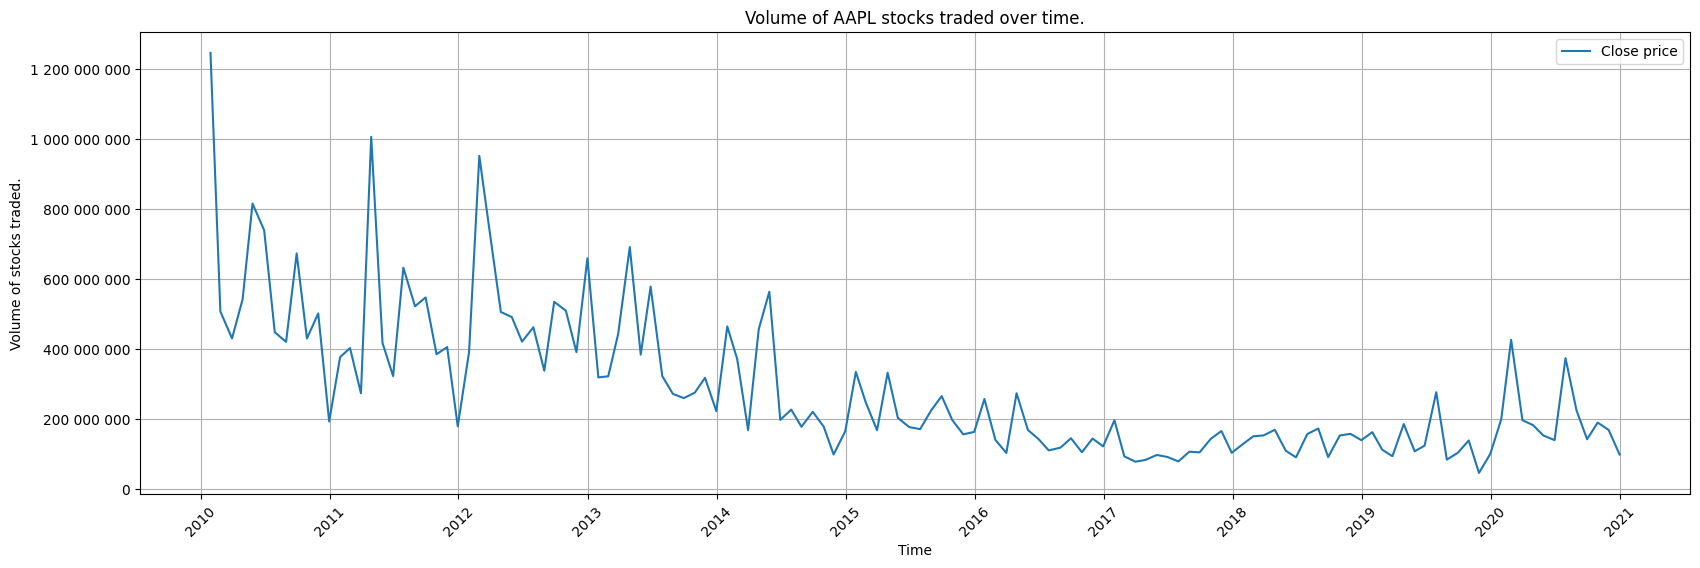

In [23]:
def format_with_spaces(x, pos):
    return f'{x:,.0f}'.replace(',', ' ')

plt.figure(figsize=(20,6))
plt.plot(df_train['Date'], df_train['Volume'], label = 'Close price')
plt.ticklabel_format(style= 'plain', axis = 'y')
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(format_with_spaces))
plt.grid(True)
plt.xticks(rotation=45)
plt.ylabel('Volume of stocks traded.')
plt.xlabel('Time')
plt.title("Volume of AAPL stocks traded over time.")
plt.legend()
plt.show()

<Figure size 1000x600 with 0 Axes>

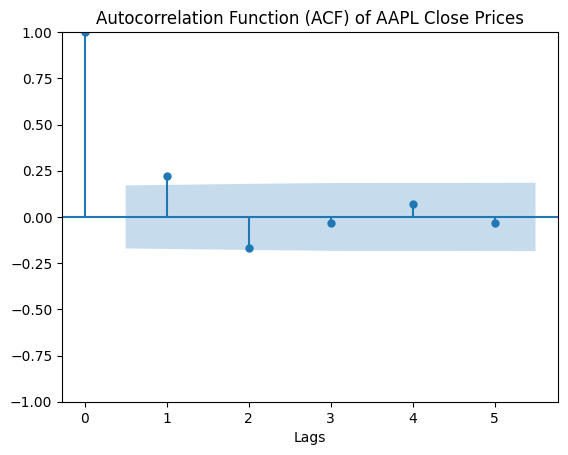

<Figure size 1200x600 with 0 Axes>

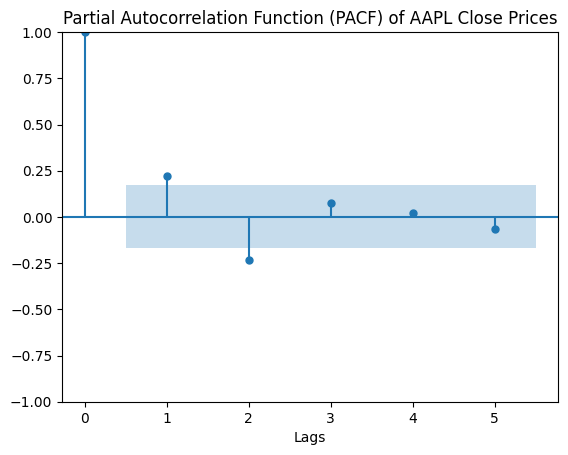

In [24]:
#Plot ACF
plt.figure(figsize=(10, 6))
sm.graphics.tsa.plot_acf(df_train['Close_diff'].dropna(), lags=5)
plt.title('Autocorrelation Function (ACF) of AAPL Close Prices')
plt.xlabel('Lags')
plt.show()

# Plot PACF
plt.figure(figsize=(12, 6))
sm.graphics.tsa.plot_pacf(df_train['Close_diff'].dropna(), lags=5)
plt.title('Partial Autocorrelation Function (PACF) of AAPL Close Prices')
plt.xlabel('Lags')
plt.show()

In [25]:
df_train.dropna(inplace=True)
pmd.auto_arima(df_train['Close_diff'],start_p=1,start_q=1,test='adf',m=12,seasonal=True, trace=True)

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(1,0,1)[12] intercept   : AIC=749.874, Time=3.09 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=754.559, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=751.086, Time=0.37 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=746.848, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=759.264, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=744.863, Time=0.10 sec
 ARIMA(0,0,1)(1,0,0)[12] intercept   : AIC=746.846, Time=0.50 sec
 ARIMA(0,0,1)(1,0,1)[12] intercept   : AIC=748.808, Time=0.90 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=745.891, Time=0.71 sec
 ARIMA(0,0,2)(0,0,0)[12] intercept   : AIC=745.149, Time=0.51 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=749.296, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[12] intercept   : AIC=746.708, Time=0.58 sec
 ARIMA(0,0,1)(0,0,0)[12]             : AIC=747.041, Time=0.29 sec

Best model:  ARIMA(0,0,1)(0,0,0)[12] intercept
Total fit time: 7.194 seconds


ARIMA(order=(0, 0, 1), scoring_args={}, seasonal_order=(0, 0, 0, 12),
      suppress_warnings=True)

In [26]:
sarima=sm.tsa.SARIMAX(df_train['Close'].dropna(),order=(3,1,3),seasonal_order=(0,0,1,12))
model = sarima.fit()
predicted = model.predict()

C:\Users\Vojta\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Vojta\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Vojta\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Vojta\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA para

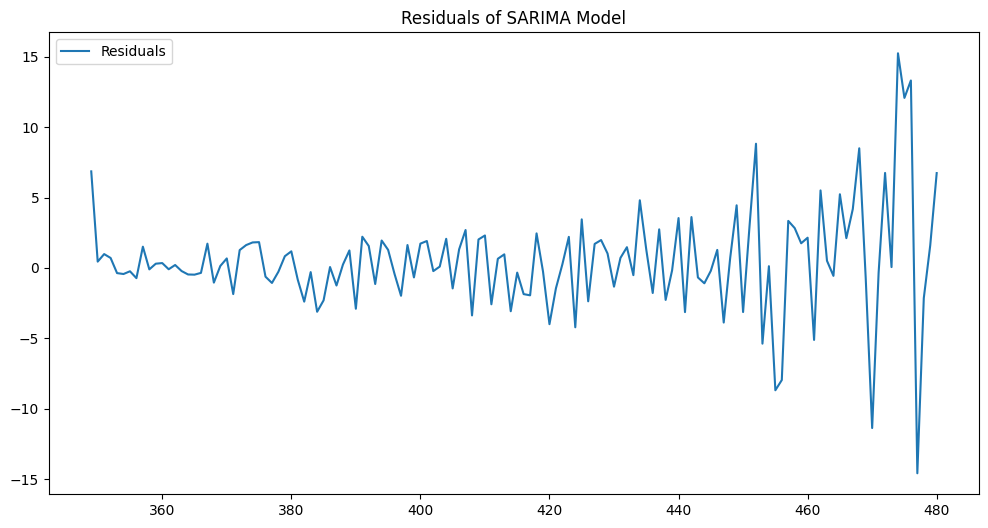

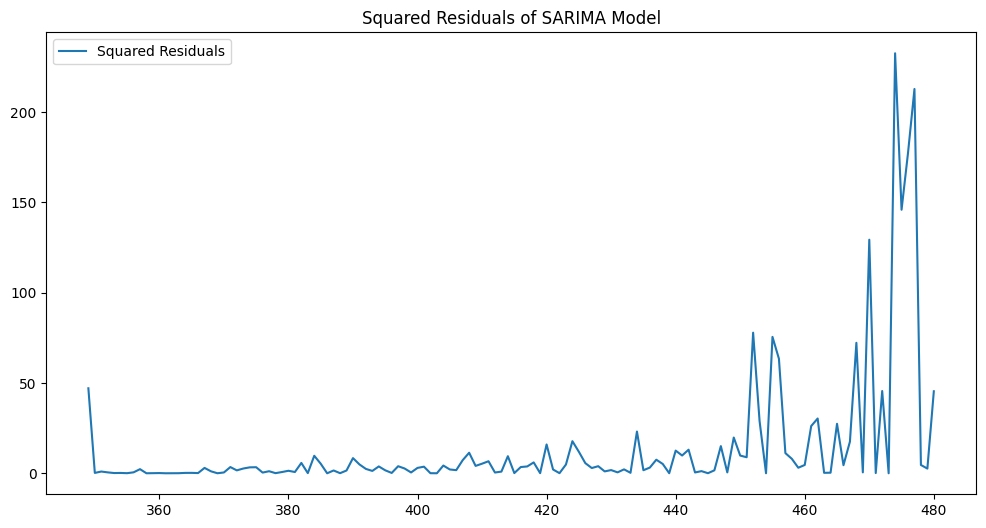

In [27]:
residuals = model.resid
plt.figure(figsize=(12, 6))
plt.plot(residuals, label='Residuals')
plt.title('Residuals of SARIMA Model')
plt.legend()
plt.show()

# Plot the squared residuals
plt.figure(figsize=(12, 6))
plt.plot(residuals**2, label='Squared Residuals')
plt.title('Squared Residuals of SARIMA Model')
plt.legend()
plt.show()

In [28]:
bp_test = sm.stats.diagnostic.het_breuschpagan(residuals, sm.add_constant(model.fittedvalues))
bp_test_statistic = bp_test[0]
bp_test_pvalue = bp_test[1]

print(f'Breusch-Pagan test statistic: {bp_test_statistic}')
print(f'Breusch-Pagan test p-value: {bp_test_pvalue}')

Breusch-Pagan test statistic: 48.263959441847035
Breusch-Pagan test p-value: 3.72536693045212e-12


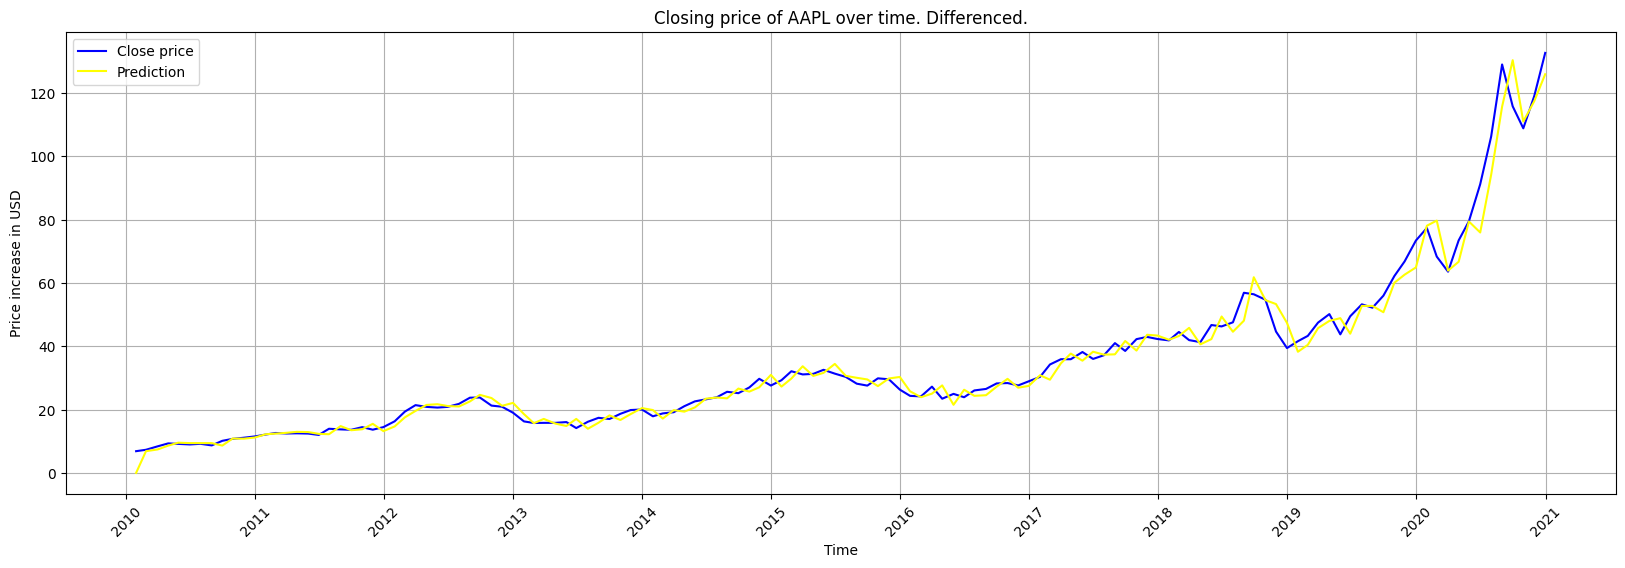

14.056306369079625

In [29]:
plt.figure(figsize=(20,6))
plt.plot(df_train['Date'], df_train['Close'], label = 'Close price', color='blue')
plt.plot(df_train['Date'], predicted, label = 'Prediction', color='yellow')
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.grid(True)
plt.xticks(rotation=45)
plt.ylabel('Price increase in USD')
plt.xlabel('Time')
plt.title("Closing price of AAPL over time. Differenced.")
plt.legend()
plt.show()
MSE(df_train['Close'], predicted)

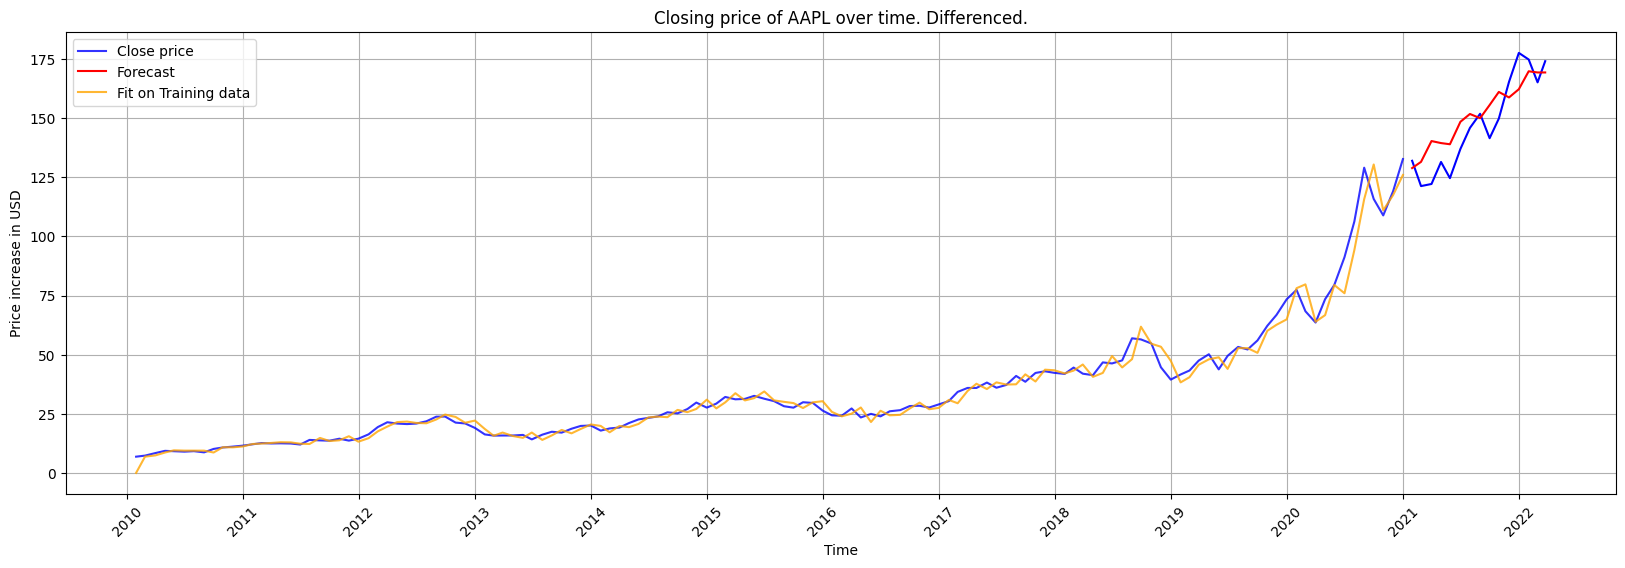

14.056306369079625
103.38230554359835
2.40715714758756
8.944859414350015


In [30]:
plt.figure(figsize=(20,6))
plt.plot(df_train['Date'], df_train['Close'], label = 'Close price', color='blue', alpha= 0.8)
plt.plot(df_test['Date'], df_test['Close'], color='blue')
plt.plot(df_test['Date'], forecast, label = 'Forecast', color='red')
plt.plot(df_train['Date'], predicted, label = 'Fit on Training data', color='orange', alpha = 0.8)

# plt.plot(df_test['Date'], forecast, label = 'Prediction', color='yellow')
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.grid(True)
plt.xticks(rotation=45)
plt.ylabel('Price increase in USD')
plt.xlabel('Time')
plt.title("Closing price of AAPL over time. Differenced.")
plt.legend()
plt.show()

print(MSE(df_train['Close'], predicted))
print(MSE(df_test['Close'], forecast))


print(MAE(df_train['Close'], predicted))
print(MAE(df_test['Close'], forecast))

        Date      Open      High       Low     Close  Adj Close    Volume  \
0 1980-12-31  0.152902  0.152902  0.152344  0.152344   0.119080  35750400   
1 1981-01-30  0.127232  0.127232  0.126116  0.126116   0.098578  46188800   
2 1981-02-27  0.118304  0.119420  0.118304  0.118304   0.092472  14761600   
3 1981-03-31  0.110491  0.110491  0.109375  0.109375   0.085493  15993600   
4 1981-04-30  0.126674  0.127790  0.126674  0.126674   0.099015  12611200   

   Moving_Avg Month_Year  Close_diff  Log_Close  
0    0.156622    1980-12         NaN  -1.881614  
1    0.132627    1981-01   -0.026228  -2.070553  
2    0.115141    1981-02   -0.007812  -2.134498  
3    0.110119    1981-03   -0.008929  -2.212973  
4    0.125744    1981-04    0.017299  -2.066138  


C:\Users\Vojta\AppData\Local\Temp\ipykernel_16564\1875235209.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Log_Close'] = np.log(df['Close'])


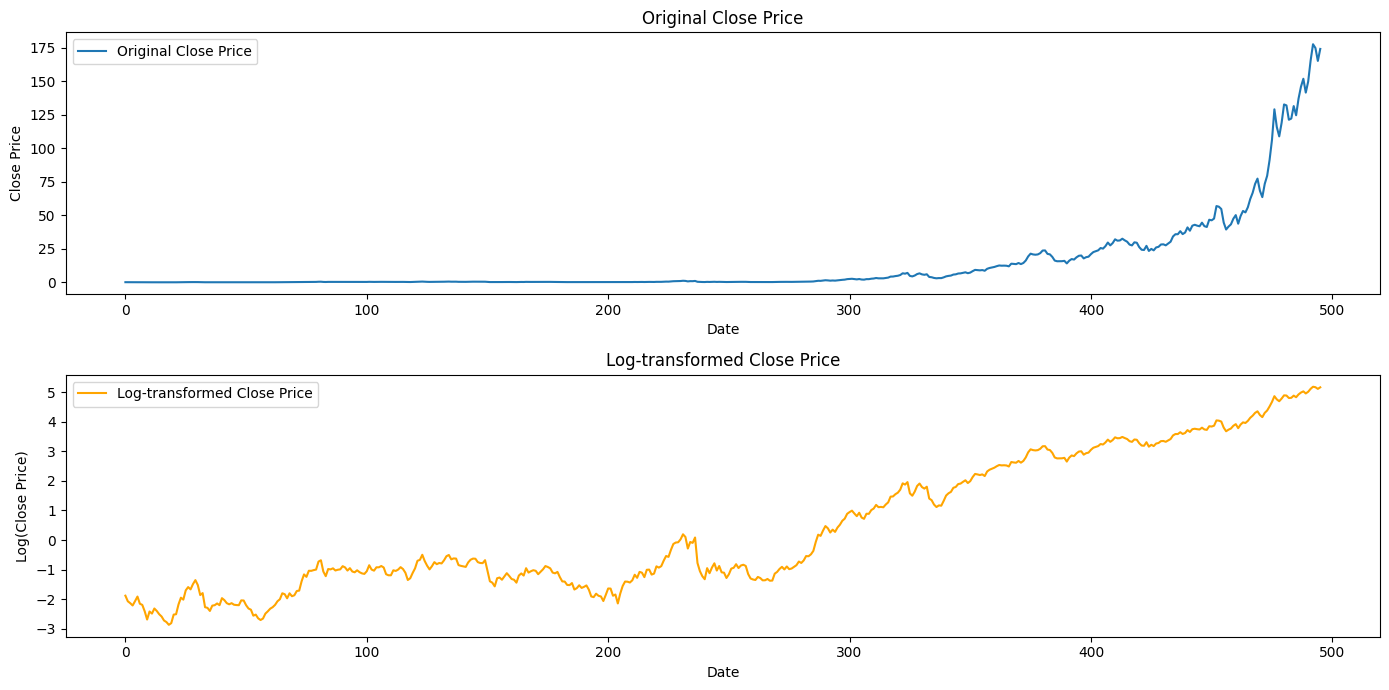

In [31]:
df['Log_Close'] = np.log(df['Close'])

# Display the first few rows to verify the transformation
print(df.head())

# Plot the original and log-transformed Close price for comparison
plt.figure(figsize=(14, 7))

# Original Close price plot
plt.subplot(2, 1, 1)
plt.plot(df.index, df['Close'], label='Original Close Price')
plt.title('Original Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()

# Log-transformed Close price plot
plt.subplot(2, 1, 2)
plt.plot(df.index, df['Log_Close'], label='Log-transformed Close Price', color='orange')
plt.title('Log-transformed Close Price')
plt.xlabel('Date')
plt.ylabel('Log(Close Price)')
plt.legend()

plt.tight_layout()
plt.show()

In [60]:
df['Close_diff'] = df['Close'] - df['Close'].shift()
df['Log_Close_Diff'] = df['Log_Close'] - df['Log_Close'].shift()
df.dropna(inplace=True)
df_train = df[df['Date'] <= '2021-01-01'].copy()
df_train = df_train[df_train['Date'] >= '2010-01-01'].copy()
df_test  = df[df['Date'] >= '2021-01-01'].copy()

C:\Users\Vojta\AppData\Local\Temp\ipykernel_16564\3688505048.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Close_diff'] = df['Close'] - df['Close'].shift()
C:\Users\Vojta\AppData\Local\Temp\ipykernel_16564\3688505048.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Log_Close_Diff'] = df['Log_Close'] - df['Log_Close'].shift()
C:\Users\Vojta\AppData\Local\Temp\ipykernel_16564\3688505048.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the c

In [62]:
test_stationarity(df, 'Log_Close')

ADF Statistic: 0.4084703198970656
p-value: 0.9818089520583729
Used Lag: 1
Number of Observations Used: 492
Critical Values:
   1%: -3.4437112724287253
   5%: -2.8674324209387345
   10%: -2.569908433637385
Best Information Criterion: -588.1055496356728
The time series is not stationary.


In [63]:
df['Log_Close_Diff']

2     -0.063945
3     -0.078475
4      0.146835
5      0.154778
6     -0.242192
         ...   
491    0.098461
492    0.071603
493   -0.015837
494   -0.056856
495    0.052785
Name: Log_Close_Diff, Length: 494, dtype: float64

In [64]:
test_stationarity(df, 'Log_Close_Diff')

ADF Statistic: -20.713609548346657
p-value: 0.0
Used Lag: 0
Number of Observations Used: 493
Critical Values:
   1%: -3.4436840273842058
   5%: -2.8674204319994674
   10%: -2.5699020441557052
Best Information Criterion: -590.0533692999943
The time series is stationary.


<Figure size 1000x600 with 0 Axes>

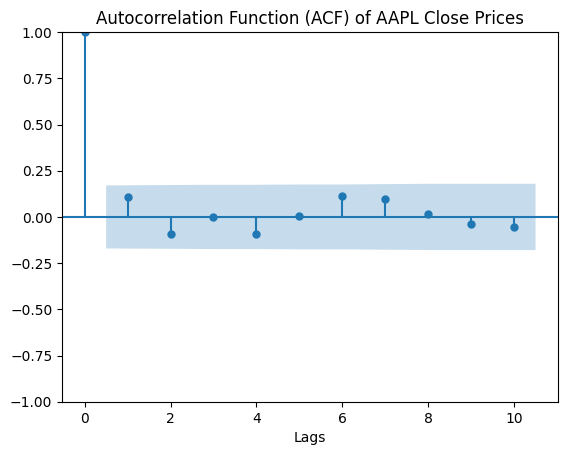

<Figure size 1200x600 with 0 Axes>

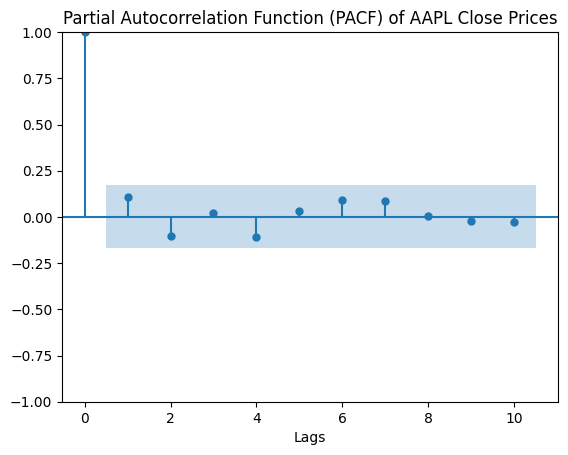

In [65]:
#Plot ACF
plt.figure(figsize=(10, 6))
sm.graphics.tsa.plot_acf(df_train['Log_Close_Diff'].dropna(), lags=10)
plt.title('Autocorrelation Function (ACF) of AAPL Close Prices')
plt.xlabel('Lags')
plt.show()

# Plot PACF
plt.figure(figsize=(12, 6))
sm.graphics.tsa.plot_pacf(df_train['Log_Close_Diff'].dropna(), lags=10)
plt.title('Partial Autocorrelation Function (PACF) of AAPL Close Prices')
plt.xlabel('Lags')
plt.show()

In [74]:
sarima=sm.tsa.SARIMAX(df_train['Log_Close'],order=(2,1,2),seasonal_order=(0,1,1,12))
model = sarima.fit()
predicted = model.predict()

C:\Users\Vojta\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Vojta\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Vojta\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [75]:
model.resid[1:]

350    0.063347
351    0.138431
352    0.105280
353   -0.016256
354   -0.021047
         ...   
476    0.159829
477   -0.144268
478   -0.072445
479    0.088297
480    0.113996
Length: 131, dtype: float64

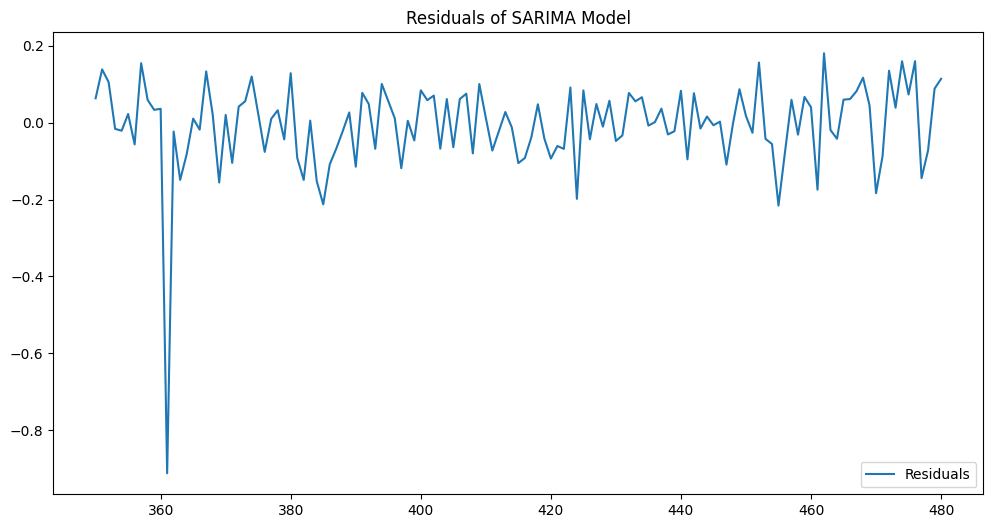

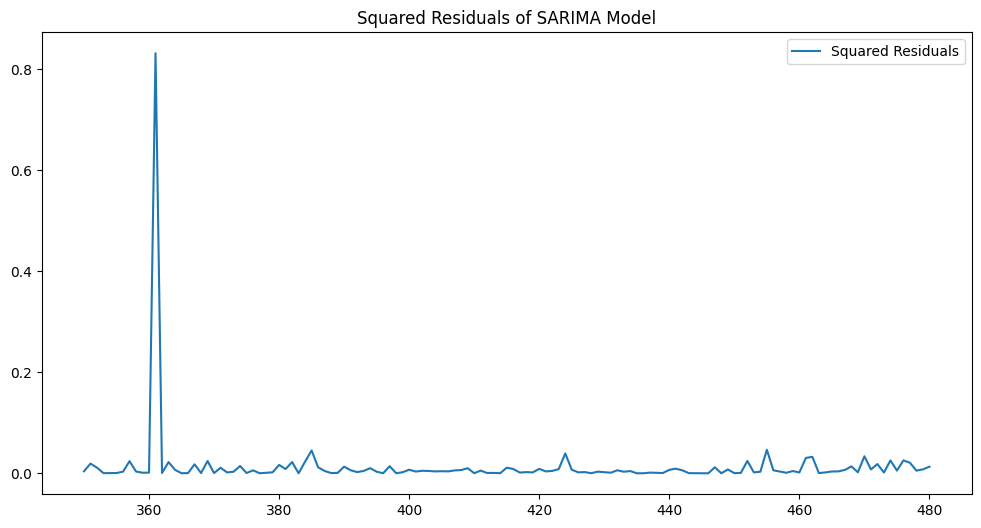

In [76]:
residuals = model.resid[1:]
plt.figure(figsize=(12, 6))
plt.plot(residuals, label='Residuals')
plt.title('Residuals of SARIMA Model')
plt.legend()
plt.show()

# Plot the squared residuals
plt.figure(figsize=(12, 6))
plt.plot(residuals**2, label='Squared Residuals')
plt.title('Squared Residuals of SARIMA Model')
plt.legend()
plt.show()

In [77]:
bp_test = sm.stats.diagnostic.het_breuschpagan(residuals, sm.add_constant(model.fittedvalues)[1:])
bp_test_statistic = bp_test[0]
bp_test_pvalue = bp_test[1]

print(f'Breusch-Pagan test statistic: {bp_test_statistic}')
print(f'Breusch-Pagan test p-value: {bp_test_pvalue}')

Breusch-Pagan test statistic: 0.11446809188929785
Breusch-Pagan test p-value: 0.7351135130437024


C:\Users\Vojta\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Vojta\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


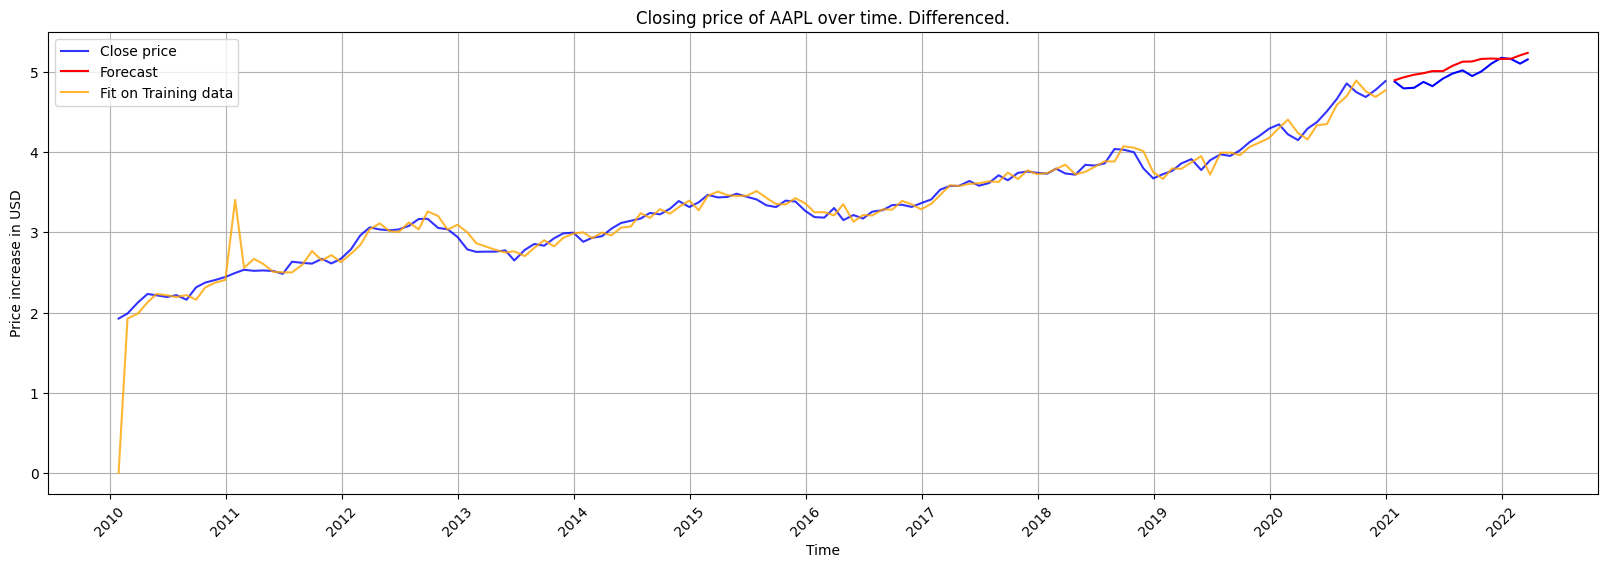

0.041579358147968766
0.01345813694824102
0.09031878149022303
0.10122338552271538


In [81]:
forecast = model.forecast(15, exog = None)
plt.figure(figsize=(20,6))
plt.plot(df_train['Date'], df_train['Log_Close'], label = 'Close price', color='blue', alpha= 0.8)
plt.plot(df_test['Date'], df_test['Log_Close'], color='blue')
plt.plot(df_test['Date'], forecast, label = 'Forecast', color='red')
plt.plot(df_train['Date'], predicted, label = 'Fit on Training data', color='orange', alpha = 0.8)

# plt.plot(df_test['Date'], forecast, label = 'Prediction', color='yellow')
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.grid(True)
plt.xticks(rotation=45)
plt.ylabel('Price increase in USD')
plt.xlabel('Time')
plt.title("Closing price of AAPL over time. Differenced.")
plt.legend()
plt.show()

print(MSE(df_train['Log_Close'], predicted))
print(MSE(df_test['Log_Close'], forecast))


print(MAE(df_train['Log_Close'], predicted))
print(MAE(df_test['Log_Close'], forecast))

In [ ]:
`